<a href="https://colab.research.google.com/github/past6301/BostonHousing/blob/main/BostonHouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/Datasets/Final Dataset/housing.csv")

In [ ]:
from sklearn.preprocessing import MinMaxScaler
x=data.drop(columns=['MEDV','ID'])
y=data[['MEDV']]
scaler_x = MinMaxScaler().fit(x)
x=scaler_x.transform(x)

scaler_y=MinMaxScaler().fit(y)
y=scaler_y.transform(y)

In [ ]:
#keep test size at 0.2
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
from keras.engine.sequential import Sequential
import keras
from keras import layers
from keras.layers import Dense,Dropout
model=Sequential()
#model.add(Dense(2048, activation='relu',input_dim=X_train.shape[1]))
#model.add(Dense(1024, activation='relu',input_dim=X_train.shape[1]))
#model.add(Dense(1024, activation='relu'))
#model.add(Dense(512, activation='relu',input_dim=X_train.shape[1]))
#model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.1))
#model.add(Dense(256, activation='relu',input_dim=X_train.shape[1]))
#model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(128, activation='relu',input_dim=X_train.shape[1]))
#model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(1))
#model.compile(optimizer='Adadelta',loss='mse',metrics=['mse'])
#model.compile(optimizer='Adam',loss='mse',metrics=['mse'])
#model.compile(optimizer='RMSProp',loss='mse',metrics=['mse'])
#model.compile(optimizer='SGD',loss='mse',metrics=['mse'])
model.compile(optimizer='ADAMax',loss='mse',metrics=['mse'])
history=model.fit(X_train,Y_train,batch_size=64,epochs=250,validation_data=(X_test,Y_test))

In [ ]:
loss,accuracy=model.evaluate(X_test,Y_test)
print("loss",loss)

4/4 [==============================] - 0s 3ms/step - loss: 0.0054 - mse: 0.0054
loss 0.005351926665753126


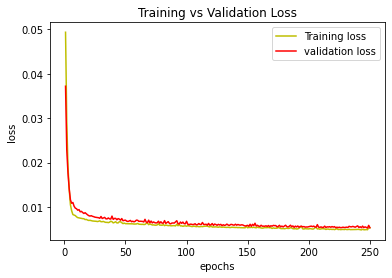

In [ ]:
import matplotlib.pyplot as plt
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,1+len(loss))
plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,'r',label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("Training vs Validation Loss")
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error as mse
import math
y_pred=model.predict(X_test)
mse=mse(Y_test,y_pred)
rsme=math.sqrt(mse)
print(mse)
print(rsme)
sub=pd.read_csv("/content/drive/MyDrive/Datasets/Final Dataset/sample.csv")
sub['MEDV']=y_pred
sub.to_csv("/content/drive/MyDrive/Datasets/Final Dataset/submission.csv",index=False)

0.005351926235993838
0.0731568604848092
